## Лабораторная работа №9. Задание 2

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

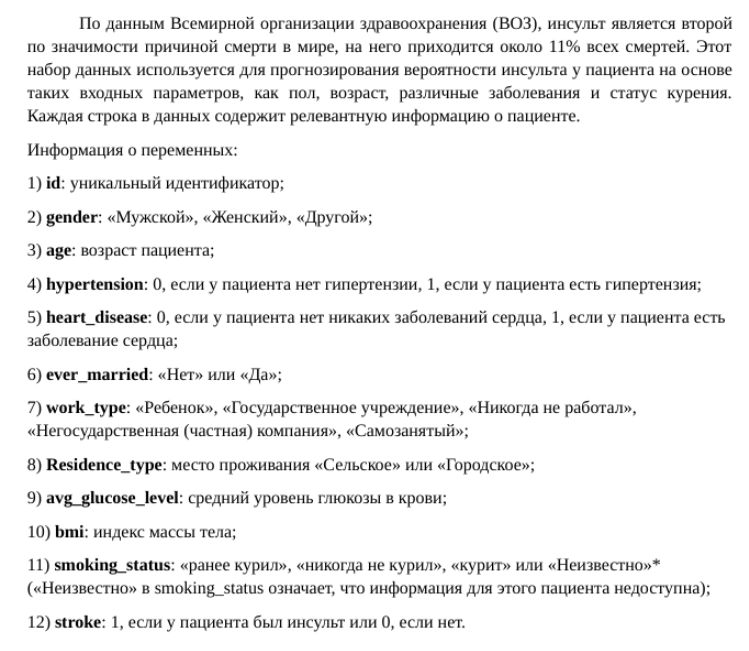

In [189]:
df = pd.read_csv("../data/lab9/healthcare-dataset-stroke-data.csv", sep=",")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


2.1 Подготовка данных

In [190]:
age_stroke_data = df[['age', 'stroke']].copy()

age_stroke_data = age_stroke_data.dropna()

display(age_stroke_data.describe())
display(age_stroke_data.info())

,age,stroke
count,5110.000000,5110.000000
mean,43.226614,0.048728
std,22.612647,0.215320
min,0.080000,0.000000
25%,25.000000,0.000000
50%,45.000000,0.000000
75%,61.000000,0.000000
max,82.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     5110 non-null   float64
 1   stroke  5110 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 80.0 KB


None

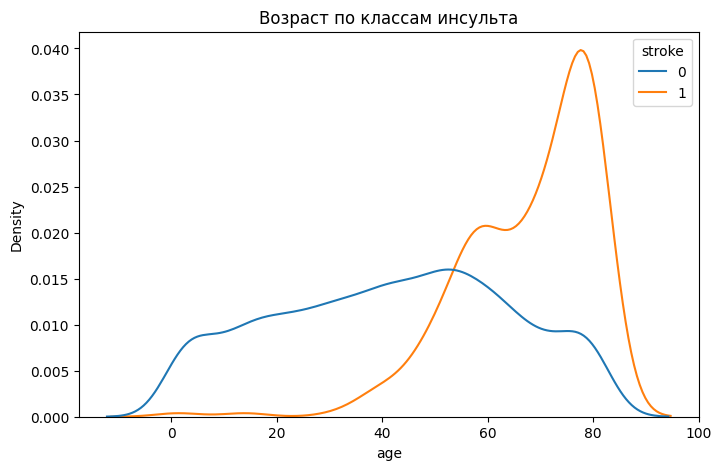

In [191]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=age_stroke_data, x='age', hue='stroke', common_norm=False)
plt.title('Возраст по классам инсульта')
plt.show()

2.3 Разделение данных на обучающие и тестовые

In [192]:
x = age_stroke_data[['age']]
y = age_stroke_data['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'Train size: {len(x_train)}, Test size: {len(x_test)}')
print('Доля положительного класса в train:', y_train.mean().round(4))
print('Доля положительного класса в test:', y_test.mean().round(4))

Train size: 4088, Test size: 1022
Доля положительного класса в train: 0.0457
Доля положительного класса в test: 0.0607


2.4 Параметры логистического уравнения регрессии

In [193]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

coefficients = logistic_model.coef_
intercept = logistic_model.intercept_

print(f"Свободный член модели - {intercept}")
print(f"Коэффициент модели - {coefficients}")

Свободный член модели - [-7.2389304]
Коэффициент модели - [[0.07368772]]


2.5 Предсказания на основе логистической модели

In [194]:
y_pred = logistic_model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
cs = classification_report(y_test, y_pred, digits=3, zero_division=0)

print(f'Accuracy: {acc}')
print(f'Classification report\n{cs}')

Accuracy: 0.9393346379647749
Classification report
              precision    recall  f1-score   support

           0      0.939     1.000     0.969       960
           1      0.000     0.000     0.000        62

    accuracy                          0.939      1022
   macro avg      0.470     0.500     0.484      1022
weighted avg      0.882     0.939     0.910      1022



2.6 Матрица ошибок

In [195]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Истинно 0', 'Истинно 1'], columns=['Предсказано 0', 'Предсказано 1'])
cm_df

,Предсказано 0,Предсказано 1
Истинно 0,960,0
Истинно 1,62,0
